In [1]:
import os


In [2]:
from PIL import Image
import numpy as np

from matplotlib import pyplot as plt

In [3]:
upload_dir = '/home/caleml/xfer1/xfer1/upload/ISL'
dataset_dir = '/local/DEEPLEARNING/deeplomatics/images'

In [5]:
petit_champ_dir = os.path.join(upload_dir, 'petit_champ')

In [ ]:
# images petit champ
count_pc = 0
count_pgm = 0
count_error = 0
count_done = 0
error = list()


for dayname in os.listdir(petit_champ_dir):
    print('doing %s' % dayname)
    
    daypath = os.path.join(petit_champ_dir, dayname)
    if not os.path.isdir(daypath):
        raise Exception('found a non-directory in %s' % petit_champ_dir)
        
    # iterate on images
    for filename in os.listdir(daypath):
        if filename.endswith('.tiff'):
            count_pc += 1
            if count_pc % 1000 == 0:
                print('done %s (%s)' % (count_pc, filename))
            
            try:
                image_path = os.path.join(petit_champ_dir, dayname, filename)
                dest_path = os.path.join(dataset_dir, 'petit_champ', '%s_%s.png' % (dayname.lower(), filename.split('.')[0]))
                
                if os.path.isfile(dest_path):
                    count_done += 1
                    continue
                    
                im = Image.open(image_path) 
                imarray = np.array(im)
                rgb_image = convert_to_rgb(imarray)
                rgb_im = Image.fromarray(rgb_image)
                rgb_im.save(dest_path)
            except:
                count_error += 1
                error.append(filename)

        elif filename.endswith('.pgm'):
            count_pgm += 1
        else:
            count_error += 1
            error.append(filename)
    
    
print('%s already done' % count_done)
print('found %s tiff images, %s pgm images and %s errors' % (count_pc, count_pgm, count_error))

doing Dimanche
done 1000 (09_21_06_360.tiff)
done 2000 (09_24_19_087.tiff)
done 3000 (10_45_21_882.tiff)
done 4000 (12_33_46_171.tiff)
done 5000 (12_37_07_959.tiff)
done 6000 (12_40_29_199.tiff)
done 7000 (13_03_25_572.tiff)
done 8000 (13_21_42_571.tiff)
done 9000 (13_25_05_338.tiff)
done 10000 (13_28_05_952.tiff)
done 11000 (13_32_36_271.tiff)
done 12000 (13_41_36_692.tiff)


In [19]:
# images grand champ + ia
grand_champ_dir = os.path.join(upload_dir, 'grand_champ_ia')

count_gc = 0
count_ia= 0
count_error = 0
count_done = 0
error = list()

for dayname in os.listdir(grand_champ_dir):
    print('doing %s' % dayname)
    
    daypath = os.path.join(grand_champ_dir, dayname)
    if not os.path.isdir(daypath):
        raise Exception('found a non-directory in %s' % grand_champ_dir)
        
    # iterate on dates
    for datename in os.listdir(daypath):
        datepath = os.path.join(daypath, datename)
        if not os.path.isdir(datepath):
            raise Exception('found a non-directory %s in %s' % (datepath, daypath))
            
        # IA / visible
        for imgtype in ['AI', 'Visible']:
            count = 0
            typename = 'image_active' if imgtype == 'AI' else 'grand_champ'
            
            for dirname in os.listdir(os.path.join(datepath, imgtype)):
                
                image_folder_path = os.path.join(datepath, imgtype, dirname)
            
                # iterate on images
                for filename in os.listdir(image_folder_path):
                    if filename.endswith('.tiff'):
                        count += 1
                        if count % 1000 == 0:
                            print('done %s (%s)' % (count, filename))

                        try:
                            image_path = os.path.join(image_folder_path, filename)
                            
                            dest_path = os.path.join(dataset_dir, typename, '%s_%s_%s.png' % (dayname.lower(), datename, filename.split('.')[0]))

                            if os.path.isfile(dest_path):
                                count_done += 1
                                continue

                            # im = Image.open(image_path) 
                            # imarray = np.array(im)
                            # rgb_image = convert_to_rgb(imarray)
                            # rgb_im = Image.fromarray(rgb_image)
                            # rgb_im.save(dest_path)
                        except:
                            count_error += 1
                            error.append(filename)

                    elif filename.endswith('.pgm'):
                        count_pgm += 1
                    else:
                        count_error += 1
                        error.append(filename)
                        
            if imgtype == 'AI':
                count_ia += count
            else:
                count_gc += count
    
    
print('%s already done' % count_done)
print('found %s active image, %s grand champ images and %s errors' % (count_ia, count_gc, count_error))

doing Dimanche
done 1000 (2019-06-09T071727,298UTC.tiff)
done 2000 (2019-06-09T071726,971UTC.tiff)
done 1000 (2019-06-09T071727,076UTC.tiff)
done 2000 (2019-06-09T071727,249UTC.tiff)
done 1000 (2019-06-09T072056,564UTC.tiff)
done 2000 (2019-06-09T072056,291UTC.tiff)
done 1000 (2019-06-09T072056,725UTC.tiff)
done 2000 (2019-06-09T072056,667UTC.tiff)
done 1000 (2019-06-09T072437,671UTC.tiff)
done 2000 (2019-06-09T072437,344UTC.tiff)
done 1000 (2019-06-09T072437,385UTC.tiff)
done 2000 (2019-06-09T072437,501UTC.tiff)
done 1000 (2019-06-09T072853,320UTC.tiff)
done 1000 (2019-06-09T072853,354UTC.tiff)
done 1000 (2019-06-09T073350,876UTC.tiff)
done 1000 (2019-06-09T073350,949UTC.tiff)
done 1000 (2019-06-09T073821,202UTC.tiff)
done 1000 (2019-06-09T074043,952UTC.tiff)
done 1000 (2019-06-09T074433,516UTC.tiff)
done 1000 (2019-06-09T074433,501UTC.tiff)
done 1000 (2019-06-09T080924,670UTC.tiff)
done 1000 (2019-06-09T080924,688UTC.tiff)
done 1000 (2019-06-09T081618,236UTC.tiff)
done 1000 (2019-06-

done 1000 (2019-06-12T132829,158UTC.tiff)
done 1000 (2019-06-12T132829,105UTC.tiff)
done 1000 (2019-06-12T133254,520UTC.tiff)
done 1000 (2019-06-12T133254,520UTC.tiff)
done 1000 (2019-06-12T134222,567UTC.tiff)
done 1000 (2019-06-12T134223,444UTC.tiff)
done 1000 (2019-06-12T143740,476UTC.tiff)
done 1000 (2019-06-12T143740,410UTC.tiff)
doing Samedi
0 already done
found 184335 active image, 173339 grand champ images and 124 errors


(480, 640)
168


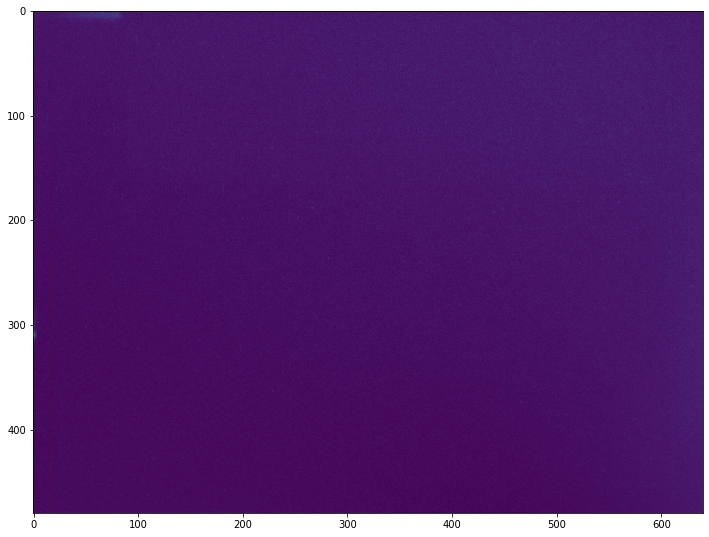

In [21]:
# test affichage AIO
folder = '/home/caleml/xfer1/xfer1/upload/ISL/grand_champ_ia/Mercredi/2019-06-12T085819,839UTC/AI/images0'
image_path = os.path.join(folder, '2019-06-12T085819,791UTC.tiff')

im = Image.open(image_path) 
imarray = np.array(im) 
print(imarray.shape)
print(imarray[9][12])

#rgb_image = convert_to_rgb(imarray)

#print(rgb_image[9][12])

#print(rgb_image.shape)


plt.figure(figsize=(12, 10))
plt.imshow(imarray)
plt.show()


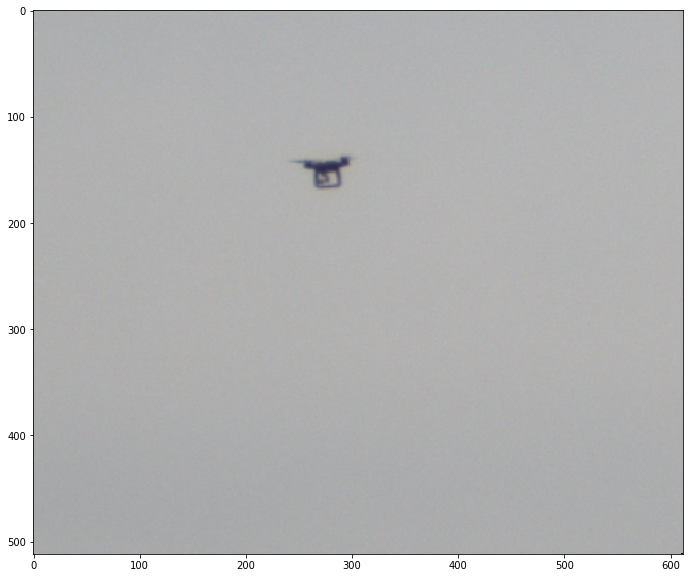

In [15]:
# test affichage nouveau dataset
image_path = os.path.join(dataset_dir, 'petit_champ', 'dimanche_09_23_46_347.png')
im = Image.open(image_path) 
imarray = np.array(im)

plt.figure(figsize=(12, 10))
plt.imshow(imarray)
plt.show()

In [ ]:
# not working: 09_27_50_038.tiff
# working: 09_23_46_347.tiff

In [7]:
def convert_to_rgb(np_image):
    h, w, _ = np_image.shape
    '''
    image is not bayer, just drop the last channel
    '''
    rgb_image = np.zeros((h, w, 3), dtype=np.uint8)
    
    # red channel
    rgb_image[:,:,0] = np_image[:,:,0]
    
    # green channel
    # rgb_image[:,:,1] = ((np_image[:,:,1].astype(np.float32) + np_image[:,:,2].astype(np.float32)) / 2.0).astype(np.int32)
    rgb_image[:,:,1] = np_image[:,:,1]
    
    # blue channel
    rgb_image[:,:,2] = np_image[:,:,2]
    
    return rgb_image
